# Model Optimization- XGBoost

Lets first see what parameters could possibly be tuned

In [1]:
from xgboost.sklearn import XGBClassifier

clf = XGBClassifier()
params = clf.get_params()
print("There are %d parameters for the Logistic Model.  The Default values are:" %len(params.keys()))
for key in params.keys():
    print("%25s:   %s" %(key,params[key]))

There are 21 parameters for the Logistic Model.  The Default values are:
               base_score:   0.5
                  booster:   gbtree
        colsample_bylevel:   1
         colsample_bytree:   1
                    gamma:   0
            learning_rate:   0.1
           max_delta_step:   0
                max_depth:   3
         min_child_weight:   1
                  missing:   None
             n_estimators:   100
                   n_jobs:   1
                  nthread:   None
                objective:   binary:logistic
             random_state:   0
                reg_alpha:   0
               reg_lambda:   1
         scale_pos_weight:   1
                     seed:   None
                   silent:   True
                subsample:   1


In [2]:
# get the data 
import ml_utils as mu

with mu.HiddenPrints():
    X, y , Xh, yh, Xv, yv = mu.get_training_holdout_validation_data()

[2018-07-12 02:23:49.124000] Starting tuning classifier__max_depth
# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:   45.9s finished


Best parameters set found on development set:

{'classifier__max_depth': 15}


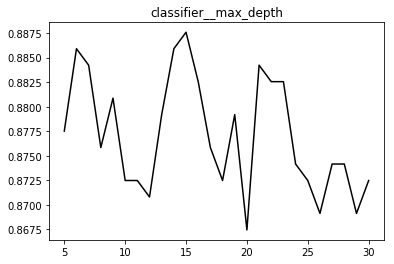

[2018-07-12 02:24:42.667663] Done with tuning classifier__max_depth (Took 0.883 minutes)


In [14]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from xgboost.sklearn import XGBClassifier

import numpy as np

# parameters and ranges to plot
param_grid = {
    "classifier__max_depth": range(5, 26, 2),
    "classifier__learning_rate": np.logspace(-1, .25, 10),
    "classifier__n_estimators": range(100, 300, 20),
    "classifier__booster": ['gbtree', 'gblinear', 'dart'],
    "classifier__gamma": np.logspace(-2, -1, 10),
}

clf = Pipeline([
    ('standardization', StandardScaler()),
    ('oversampler', RandomOverSampler()),
    ('classifier', XGBClassifier(random_state = 84))
])

for parameter, param_range in dict.items(param_grid):
    with mu.Timer("tuning %s" %parameter) as timer:
        mu.unidirectional_grid_search_optimization(clf, parameter, param_range, X, y)